**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

**Why Do We Need Feature Selection?**

*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.

**Types of Feature Selection Methods**

<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.

<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.

<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
np.random.seed(42)
data=pd.DataFrame({
    'Size':np.random.randint(1000,5000,100),
    'Bedrooms':np.random.randint(1,5,100),
    'Age':np.random.randint(1,5,100),
    'Price':np.random.randint(100000,500000,100)
})

In [25]:
data.head()

,Size,Bedrooms,Age,Price
0,4174,2,4,417824
1,4507,2,3,357426
2,1860,4,1,277789
3,2294,2,4,318164
4,2130,2,1,413003


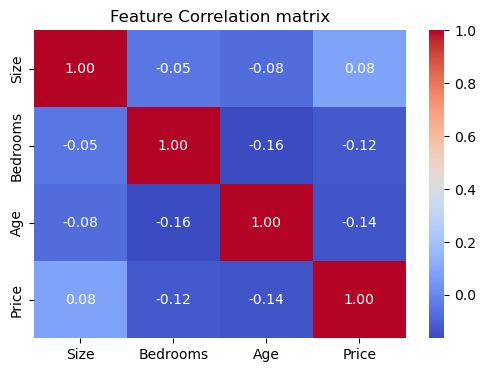

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Feature Correlation matrix")
plt.show()

In [33]:
X=data.drop(columns=['Price'])
y=data['Price']
model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
X_selected=rfe.fit_transform(X,y)
print("Selected features using RFE:",X.columns[rfe.support_])

Selected features using RFE: Index(['Size', 'Bedrooms'], dtype='object')


In [35]:
lasso=Lasso(alpha=0.1)
lasso.fit(X,y)
importance=np.abs(lasso.coef_)
selected_features=X.columns[importance>0]
print("Selected Features using lasso:",selected_features)

Selected Features using lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')
